# Identifying Entities in Healthcare Data

#### Workspace set up: Import and Install useful packages.

In [1]:

!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
model = spacy.load("en_core_web_sm")

### Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

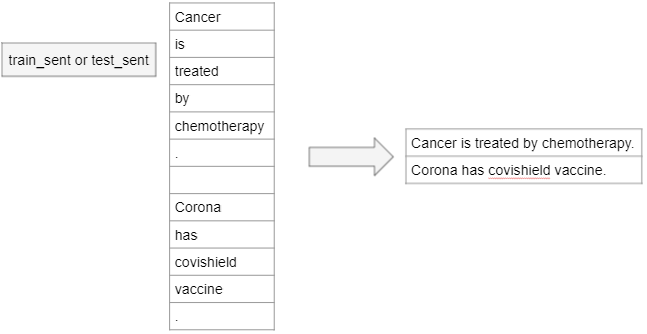

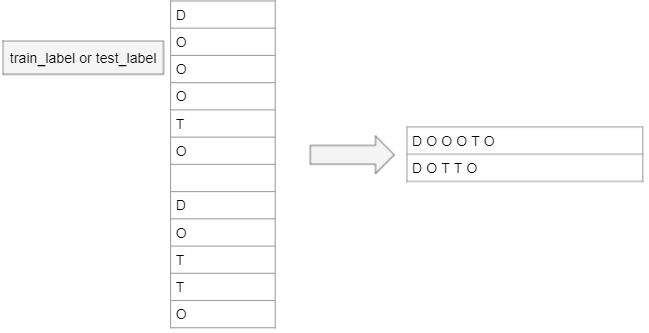

In [2]:
#Reading the train and test dataset
with open('train_sent', 'r') as train_sent_file:
  train_words = train_sent_file.readlines()

with open('train_label', 'r') as train_labels_file:
  train_labels = train_labels_file.readlines()

with open('test_sent', 'r') as test_sent_file:
  test_words = test_sent_file.readlines()

with open('test_label', 'r') as test_labels_file:
  test_labels = test_labels_file.readlines()

In [3]:
# Define a function to form a sentence
def sentence(data):
    sent_list=[]
    sentence=""
    for word in data:
        if(word=='\n'):
            sent_list.append(sentence)
            sentence=""
        else:
            sentence+=word.strip()+" "
    return sent_list

In [4]:
# Complete Sentence for the words of the train and test dataset
train_sentences = sentence(train_words)
train_labels = sentence(train_labels)
test_sentences = sentence(test_words)
test_labels = sentence(test_labels)

In [5]:
# Print the 5 sentences in the test set i.e. index value from 0 to 5.
print(test_sentences[0:5])
print('\n')
# Print the labels of this sentence
print(test_labels[0:5])

['Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 ) ', 'As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration ', 'The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period ', 'There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 ) ', 'Fluctuations in ambient temperature are inversely correlated to changes in AFI ']


['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O ', 'O O O O O O O O O O O O O O O O O O O ', 'O O O O O O O O O O O O O O O O O O O O O O O O ', 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O ', 'O O O O

In [6]:
# Print the 5 sentences in the train set i.e. index value from 0 to 5.
print(train_sentences[0:5])
print('\n')
# Print the labels of this sentence
print(train_labels[0:5])

['All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status ) ', 'The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 ) ', 'Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 ) ', "The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 ) ", "Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively ) "]


['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O ', 'O O O O O O O O O O O O O O O O O O O O O O O O O ', 'O O O O O O O O O O O O O O O ', 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O '

### Count the number of sentences in the processed train and test dataset 

In [7]:
print('Total number of sentences in the processed TRAIN dataset : ',len(train_sentences))
print('Total number of sentences in the processed TEST dataset : ', len(test_sentences))

Total number of sentences in the processed TRAIN dataset :  2599
Total number of sentences in the processed TEST dataset :  1056


### Count the number of lines of labels in the processed train and test dataset.

In [8]:
print('Total number of labels in the processed TRAIN dataset : ', len(train_labels))
print('Total number of labels in the processed TEST dataset : ',len(test_labels))

Total number of labels in the processed TRAIN dataset :  2599
Total number of labels in the processed TEST dataset :  1056


### Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [9]:
# Count of sentences in the train+test set
total_sentences = train_sentences.copy()
total_sentences.extend(test_sentences)
print("The total number of sentences from train and  test dataset are: ", len(total_sentences))

The total number of sentences from train and  test dataset are:  3655


In [10]:
# Find the total count of 'NOUN' and 'PROPN' in the train and test data
pos_tokens={"TEXT":[], "POSTAG":[]}
for doc in total_sentences:
    processed_doc = model(doc)
    for token in processed_doc:
        if(token.pos_ in ["NOUN", "PROPN"] ):
            pos_tokens["TEXT"].append(token.text)
            pos_tokens["POSTAG"].append(token.pos_)

In [11]:
# Create dataframe to store the tokens:
df = pd.DataFrame(pos_tokens)
print("The total count of NOUN are: ", df['POSTAG'].value_counts()[0])
print("The total count of PROPN are: ",df['POSTAG'].value_counts()[1])

The total count of NOUN are:  20628
The total count of PROPN are:  3781


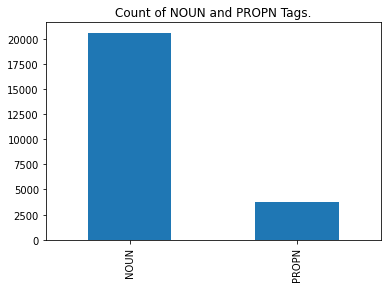

In [12]:
df['POSTAG'].value_counts().plot.bar()
plt.title('Count of NOUN and PROPN Tags.')
plt.show()

### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [13]:
df['TEXT'].value_counts().head(25)

patients        492
treatment       281
%               246
cancer          200
therapy         175
study           153
disease         141
cell            140
lung            116
group            94
chemotherapy     88
gene             88
effects          85
results          79
women            77
TO_SEE           75
use              74
risk             71
surgery          71
cases            71
analysis         70
rate             67
response         66
survival         65
children         64
Name: TEXT, dtype: int64

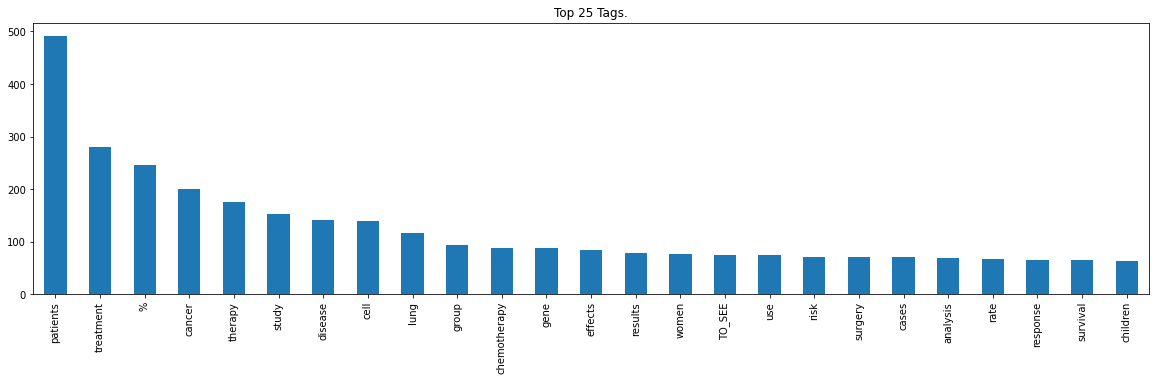

In [14]:
plt.figure(figsize=(20,5))
df['TEXT'].value_counts().head(25).plot.bar()
plt.title('Top 25 Tags.')
plt.show()

## Defining features for CRF





In [15]:
# Get the list of POS tags
def pos_tagger(sentence):
    pos_tagList=[]
    sent1 = model(sentence)
    for tok in sent1:
        pos_tagList.append(tok.pos_)
    return pos_tagList

In [16]:
#Check if the function is working as expected
example_sentence = train_sentences[2]
print(example_sentence)
pos_list = pos_tagger(example_sentence)
print(pos_list)

Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 ) 
['ADJ', 'NOUN', 'AUX', 'DET', 'ADV', 'ADJ', 'NOUN', 'PUNCT', 'NUM', 'NOUN', 'PUNCT', 'NUM', 'ADP', 'NUM', 'PUNCT']


In [17]:
# Get the feature for one word
def getFeaturesForOneWord(sentence, pos, pos_list):
  word = sentence[pos]

  features = [
    'word.pos=' + pos_list[pos],
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[:3]=' + word[:3],     # first three characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]
 
  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.pos=' + pos_list[pos-1],
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper()
  ])
  else:
    features.append('BEG') # feature to track begin of sentence 
 
  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence
 
  return features

## Getting the features

### Write a code/function to get the features for a sentence

In [18]:
# Get features for a sentence.
def getFeaturesForOneSentence(sentence,pos_list):
    sentence_list = sentence.split()
    return [getFeaturesForOneWord(sentence_list, pos,pos_list) for pos in range(len(sentence_list))]

In [19]:
#Check if the function is performimg as expected
example_sentence = train_sentences[2]
pos_list = pos_tagger(example_sentence)
print(pos_list)
features = getFeaturesForOneSentence(example_sentence,pos_list)
features[1]

['ADJ', 'NOUN', 'AUX', 'DET', 'ADV', 'ADJ', 'NOUN', 'PUNCT', 'NUM', 'NOUN', 'PUNCT', 'NUM', 'ADP', 'NUM', 'PUNCT']


['word.pos=NOUN',
 'word.lower=presentation',
 'word[-3:]=ion',
 'word[:3]=pre',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=False',
 'prev_word.pos=ADJ',
 'prev_word.lower=abnormal',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=True']

### Write a code/function to get the labels of a sentence

In [20]:
# Get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
    return labels.split()

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [21]:
X_train = [getFeaturesForOneSentence(sentence, pos_tagger(sentence)) for sentence in train_sentences]
X_test = [getFeaturesForOneSentence(sentence,  pos_tagger(sentence)) for sentence in test_sentences]

### Define the labels as the target variable for test and the train dataset

In [22]:
Y_train = [getLabelsInListForOneSentence(labels) for labels in train_labels]
Y_test = [getLabelsInListForOneSentence(labels) for labels in test_labels]

In [23]:
# Check how the feature looks like for 1 Train sentence
print(train_sentences[0])
X_train[0]

All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status ) 


[['word.pos=DET',
  'word.lower=all',
  'word[-3:]=All',
  'word[:3]=All',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=True',
  'BEG'],
 ['word.pos=ADJ',
  'word.lower=live',
  'word[-3:]=ive',
  'word[:3]=liv',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.pos=DET',
  'prev_word.lower=all',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=True'],
 ['word.pos=NOUN',
  'word.lower=births',
  'word[-3:]=ths',
  'word[:3]=bir',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.pos=ADJ',
  'prev_word.lower=live',
  'prev_word.isupper=False',
  'prev_word.isdigit=False',
  'prev_words.startsWithCapital=False'],
 ['word.pos=X',
  'word.lower=>',
  'word[-3:]=>',
  'word[:3]=>',
  'word.isupper=False',
  'word.isdigit=False',
  'words.startsWithCapital=False',
  'prev_word.pos=NOUN',
  'prev_word.lower=births',
  'prev_word.isu

## Build the CRF Model

In [24]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=200)

The crf.fit will throws error is sklearn version is above 0.23. We need to either downgrade sklearn or use try and except as a workaround if using higher version of sklearn.

In [25]:
# Use this as a workaround if it throws AttributeError
try:
    crf.fit(X_train, Y_train)
except AttributeError:
    pass

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [26]:
# Make predictions
Y_pred = crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [27]:
# Calculate and print the f1 score
print("The f1 score is ",metrics.flat_f1_score(Y_test, Y_pred, average='weighted'))

The f1 score is  0.9156798584308031


In [35]:
# Print the true labels and predicted labels for the sentence in test data
id = 1000
print("Sentence:",test_sentences[id])
print("True Labels:", Y_test[id])
print("Pred Labels:", Y_pred[id])

Sentence: Antimicrobial treatment options in the management of odontogenic infections 
True Labels: ['T', 'T', 'O', 'O', 'O', 'O', 'O', 'D', 'D']
Pred Labels: ['T', 'T', 'O', 'O', 'O', 'O', 'O', 'D', 'D']


### Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

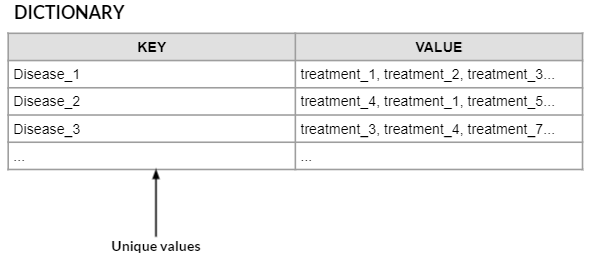

In [29]:
#Creates the function to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset 
def get_diseaseTreatmentInfo(data):
    disease_treatment={}
    for index, sentence in enumerate(data):
        disease = []
        treatment = []
        for word_index, word in enumerate(sentence):
            if(word=='D'):
                disease.append(test_sentences[index].split()[word_index])
            if(word=='T'):
                treatment.append(test_sentences[index].split()[word_index])
        if(len(disease)>0 and len(treatment)>0):
            disease_treatment[' '.join(disease)] = treatment
    return disease_treatment

In [30]:
def dfDiseaseTreatment(disease_treatment): 
    return pd.DataFrame({"Disease":list(disease_treatment.keys()),"Treatments":disease_treatment.values()})

In [34]:
#Create the test data in a requisite dataframe format
dt = get_diseaseTreatmentInfo(Y_pred)
df_dt_mapping = dfDiseaseTreatment(dt)
df_dt_mapping.head(10)

,Disease,Treatments
0,hereditary retinoblastoma,[radiotherapy]
1,unstable angina or non-Q-wave myocardial infar...,[roxithromycin]
2,coronary-artery disease,"[Antichlamydial, antibiotics]"
3,primary pulmonary hypertension ( PPH ),[fenfluramines]
4,essential hypertension,[moxonidine]
5,foot infection,"[G-CSF, treatment]"
6,hemorrhagic stroke,"[double-bolus, alteplase]"
7,valvular heart diseasein cardiac disease,[fenfluramine-phentermine]
8,early Parkinson 's disease,"[Ropinirole, monotherapy]"
9,sore throat,[Antibiotics]


In [32]:
# Convert the list format of Treatment column to string
df_dt_mapping["Treatments"] = df_dt_mapping["Treatments"].apply(lambda x:' , '.join(x))
df_dt_mapping.head(10)

,Disease,Treatments
0,hereditary retinoblastoma,radiotherapy
1,unstable angina or non-Q-wave myocardial infar...,roxithromycin
2,coronary-artery disease,"Antichlamydial , antibiotics"
3,primary pulmonary hypertension ( PPH ),fenfluramines
4,essential hypertension,moxonidine
5,foot infection,"G-CSF , treatment"
6,hemorrhagic stroke,"double-bolus , alteplase"
7,valvular heart diseasein cardiac disease,fenfluramine-phentermine
8,early Parkinson 's disease,"Ropinirole , monotherapy"
9,sore throat,Antibiotics


### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [33]:
disease='hereditary retinoblastoma'
print("The treatment for disease hereditary retinoblastoma  is: ", ' '.join(df_dt_mapping[df_dt_mapping['Disease'] == disease]['Treatments']))

The treatment for disease hereditary retinoblastoma  is:  radiotherapy
